# 생물정보학 및 실습 1 - Term Project (Free Analysis) 1/3
생물정보학 및 실습 1   
서울대학교 협동과정 생물정보학전공 2022년 1학기

In [1]:
from collections import Counter, defaultdict
import math
import os
import sys
import pickle
import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pysam

In [2]:
CLIP_BAM_PATH = '../data/external-datapack/ENCFF756VXR.bam'
FASTA_DIR_PATH    = '../data/hg38ChromFa/chroms'
HEXAMER_FASTA_PATH = '../stats/hexamers-LIN28B-cres12.fasta'
OCTADECAMER_FASTA_PATH = '../stats/octadecamers.LIN28B.fasta'

## 1. Prepare Reference FASTAs
+ `mm39.chromFa.tar.gz` was downloaded from UCSC Genome Browser
+ FASTAs were extracted into `FASTA_DIR_PATH` by `tar -zxvf`

In [3]:
# Make dctFastaMatch that has {gencode chromID : RefSeq chromID}
lstRefSeqFa = os.listdir(FASTA_DIR_PATH)
dctFastaMatch = {}
for fa in lstRefSeqFa:
    chrId = fa.replace('.fa', '')
    dctFastaMatch[chrId] = fa

In [4]:
# Validation
dctFastaMatch['chr1']

'chr1.fa'

In [5]:
for chrId in list(dctFastaMatch.keys()):
    if 'alt' in chrId:
        del dctFastaMatch[chrId]

In [6]:
del dctFastaMatch['chrM']

## 2. Collect Putative Binding Sequences

In [91]:
DEPTH_CUTOFF = 50
CRES_CUTOFF  = 0.9

In [92]:
def get_chr_binding_positions(chrId):
    pileUp = pysam.AlignmentFile(CLIP_BAM_PATH).pileup(chrId)
    lstBindingPositions = []
    for col in pileUp:
        bases = col.get_query_sequences()
        bases = [base.upper() for base in bases]
        if len(bases) >= DEPTH_CUTOFF:
            cres = stats.entropy(list(Counter(bases).values()), base=2)
            if cres >= CRES_CUTOFF:
                lstBindingPositions.append(col.reference_pos)
    return lstBindingPositions

In [93]:
# Complement: A <--> T, G <--> C
# Dictionary for the Unicode code point
dctComplement = str.maketrans('ACGT', 'TGCA')

In [94]:
def get_binding_sequences(chrId):
    lstBindingPositions = get_chr_binding_positions(chrId)

    fasta_file_path = os.path.join(FASTA_DIR_PATH, dctFastaMatch[chrId])
    with open(fasta_file_path, 'rt') as fIn:
        assert next(fIn).startswith('>') # Skip header
        seq = fIn.read().strip().replace('\n', '').upper() # Remove new line chr and make lowercase be uppercase

    dctSeqs = Counter()
    for pos in lstBindingPositions:
        dctSeqs.update([seq[pos-8:pos+10]])
    return dctSeqs

In [95]:
dctSeqs = Counter()
for chrId, fa in dctFastaMatch.items():
    print(time.ctime(), f'{fa} now opens', sep=' --- ')
    dctSeqs.update(get_binding_sequences(chrId))

Fri Jun 10 00:55:06 2022 --- chr1.fa now opens
Fri Jun 10 00:55:49 2022 --- chr10.fa now opens
Fri Jun 10 00:56:13 2022 --- chr11.fa now opens
Fri Jun 10 00:56:37 2022 --- chr11_KI270721v1_random.fa now opens
Fri Jun 10 00:56:37 2022 --- chr12.fa now opens
Fri Jun 10 00:57:03 2022 --- chr13.fa now opens
Fri Jun 10 00:57:15 2022 --- chr14.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_GL000009v2_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_GL000225v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_KI270722v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_GL000194v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_KI270723v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_KI270724v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_KI270725v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr14_KI270726v1_random.fa now opens
Fri Jun 10 00:57:34 2022 --- chr15.fa now opens
Fri Jun 10 00:57:49 2022 --- chr15_KI270727v1_random.fa now opens
Fri J

Fri Jun 10 01:03:52 2022 --- chrUn_KI270379v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270389v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270390v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270387v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270395v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270396v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270388v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270394v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270386v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270391v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270383v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270393v1.fa now opens
Fri Jun 10 01:03:52 2022 --- chrUn_KI270384v1.fa now opens
Fri Jun 10 01:03:53 2022 --- chrUn_KI270392v1.fa now opens
Fri Jun 10 01:03:53 2022 --- chrUn_KI270381v1.fa now opens
Fri Jun 10 01:03:53 2022 --- chrUn_KI270385v1.fa now opens
Fri Jun 10 01:03:53 2022 --- chrUn_KI270382v1.fa now ope

In [96]:
dctSeqs.most_common(10)

[('TGGCTTCAGCAAACTCAG', 2),
 ('GGCTTCAGCAAACTCAGA', 2),
 ('GCTTCAGCAAACTCAGAA', 2),
 ('CTTCAGCAAACTCAGAAG', 2),
 ('AGGTCCTACCTTGCTAAC', 1),
 ('GTGGAGAGAAACGAGTGT', 1),
 ('GGCCTTGCGTTTCTTAGC', 1),
 ('TTGCGTTTCTTAGCAGGG', 1),
 ('ATTAGGCTCTTCCCATGG', 1),
 ('TCCTCACGCAAGAGGCAT', 1)]

In [97]:
dfSeqs = pd.DataFrame(dctSeqs.most_common(), columns=['octadecamer', 'counts']).set_index('octadecamer')
dfSeqs.head()

,counts
octadecamer,
TGGCTTCAGCAAACTCAG,2
GGCTTCAGCAAACTCAGA,2
GCTTCAGCAAACTCAGAA,2
CTTCAGCAAACTCAGAAG,2
AGGTCCTACCTTGCTAAC,1


In [98]:
len(dfSeqs)

1954

In [99]:
dfSeqs.to_csv('../stats/octadecamers.LIN28B.txt', sep='\t')

## 3. Discard Noise

In [100]:
dfSeqs = pd.read_table('../stats/octadecamers.LIN28B.txt')
print(len(dfSeqs))
dfSeqs.head()

1954


,octadecamer,counts
0,TGGCTTCAGCAAACTCAG,2
1,GGCTTCAGCAAACTCAGA,2
2,GCTTCAGCAAACTCAGAA,2
3,CTTCAGCAAACTCAGAAG,2
4,AGGTCCTACCTTGCTAAC,1


In [101]:
dfSeqs['hexamer'] = dfSeqs.octadecamer.str[6:12]
dfSeqs['centre'] = dfSeqs.hexamer.str[2]
dfSeqs.head()

,octadecamer,counts,hexamer,centre
0,TGGCTTCAGCAAACTCAG,2,CAGCAA,G
1,GGCTTCAGCAAACTCAGA,2,AGCAAA,C
2,GCTTCAGCAAACTCAGAA,2,GCAAAC,A
3,CTTCAGCAAACTCAGAAG,2,CAAACT,A
4,AGGTCCTACCTTGCTAAC,1,TACCTT,C


In [102]:
dfSeqs.groupby('hexamer').sum().sort_values('counts',ascending=False).head(50)

,counts
hexamer,
TCAGAA,8
AAGGAG,6
TCTGAG,5
CTGAGG,5
CAGAAA,5
TACCTG,5
TACCTC,5
TCTGAT,5
GTCTGA,5


In [115]:
dfOctadecamers = dfSeqs[['octadecamer', 'counts']].set_index('octadecamer')
dfOctadecamers

,counts
octadecamer,
TGGCTTCAGCAAACTCAG,2
GGCTTCAGCAAACTCAGA,2
GCTTCAGCAAACTCAGAA,2
CTTCAGCAAACTCAGAAG,2
AGGTCCTACCTTGCTAAC,1
...,...
AAAAGATCACCTCTCCAC,1
AAAGATCACCTCTCCACG,1
GCCAGCATCTTCTGGGCT,1


In [103]:
dfHexamers = dfSeqs[['hexamer', 'counts']].groupby('hexamer').sum()
dfHexamers = dfHexamers.sort_values('counts', ascending=False)
dfHexamers

,counts
hexamer,
TCAGAA,8
AAGGAG,6
TCTGAG,5
CTGAGG,5
CAGAAA,5
...,...
CCTTCA,1
CCTTAG,1
CCTGTT,1


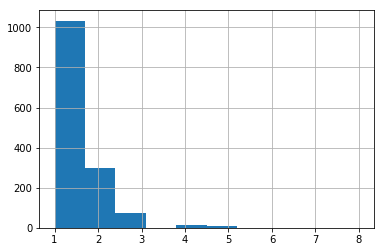

In [104]:
dfHexamers.counts.hist()

In [113]:
stHexamers = set(list(dfHexamers[dfHexamers.counts >= 4].index))
stHexamers

{'AAGGAG',
 'AAGGTG',
 'AGGCTG',
 'AGGTAA',
 'ATCTGG',
 'CAGAAA',
 'CATGTG',
 'CTGAGA',
 'CTGAGG',
 'CTGATG',
 'CTGATT',
 'CTTTCT',
 'GCTGAG',
 'GTCTGA',
 'TACCTC',
 'TACCTG',
 'TCAGAA',
 'TCTGAG',
 'TCTGAT',
 'TGCCAT',
 'TGTCTG',
 'TTTCTG'}

In [123]:
dfOctadecamers = dfOctadecamers[dfOctadecamers.index.str[6:12].isin(stHexamers)]
dfOctadecamers

,counts
octadecamer,
GGCGCCCTTTCTTTACTG,1
CCTTTTAGGCTGAGGAAG,1
TTTTAGGCTGAGGAAGGC,1
TTTAGGCTGAGGAAGGCC,1
GTGGTTCTTTCTATCCTA,1
...,...
CTGAACTGCCATGAGGAA,1
GGAAACTGCCATGTCACC,1
TTTGCTTACCTCTCTTGC,1


In [124]:
dctOctadecamers = dfOctadecamers['counts'].to_dict()
list(dctOctadecamers.items())[0]

('GGCGCCCTTTCTTTACTG', 1)

## 4. Make FASTA

In [125]:
with open(OCTADECAMER_FASTA_PATH, 'wt') as fOut:
    for i, (hexamer, counts) in enumerate(dctOctadecamers.items()):
        for j in range(counts):
            print(
                f'>octadecamer-{i}-{j}',
                hexamer.replace('T', 'U'),
                sep='\n',
                file=fOut
            )

In [126]:
!head $OCTADECAMER_FASTA_PATH

>octadecamer-0-0
GGCGCCCUUUCUUUACUG
>octadecamer-1-0
CCUUUUAGGCUGAGGAAG
>octadecamer-2-0
UUUUAGGCUGAGGAAGGC
>octadecamer-3-0
UUUAGGCUGAGGAAGGCC
>octadecamer-4-0
GUGGUUCUUUCUAUCCUA


## 5. Plot WebLogo

WebLogo site에서 진행